INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fde4f651cf8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp0tb7aasy'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp0tb7aasy/model.ckpt.
INFO:tensorflow:loss = 9280.836, step = 0
INFO:tensorfl

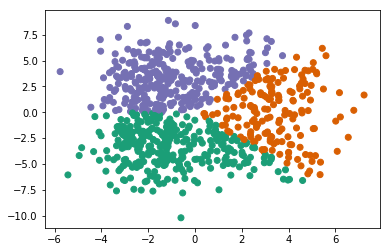

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.learn import KMeansClustering
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
%matplotlib inline
class DataSet():

    def __init__(self):
        
        def randrange(mu,sig,num=200):
            return np.random.normal(mu,sig,num)

        a = np.array([randrange(2,2),randrange(3,2)]).T
        b = np.array([randrange(-2,1),randrange(-3,2)]).T
        c = np.array([randrange(-2,1),randrange(3,2)]).T
        d = np.array([randrange(2,2),randrange(-3,2)]).T
        self.data = np.concatenate([a,b,c,d])

    def getData(self):
        return self.data


class Config():

    def __init__(self,num_steps=2000,centroids=3):
        self.num_steps=num_steps
        self.centroids = centroids


if __name__=='__main__':

    myConfig = Config() 
    myDataset = DataSet()

    def input_fn(data):
        features = tf.constant(data,tf.float32,data.shape)
        labels = None
        return features,labels

    model = KMeansClustering(num_clusters=myConfig.centroids,
                             relative_tolerance=0.00001)

    model.fit(input_fn=lambda:input_fn(myDataset.data),
              steps=myConfig.num_steps)

    assignments = list(model.predict_cluster_idx(input_fn=lambda:input_fn(myDataset.data)))

    cmap = mpl.cm.Dark2.colors
    colors=[cmap[i] for i in assignments]
    plt.scatter(myDataset.data[:,0],myDataset.data[:,1],color=colors)
    plt.show()
    
    
